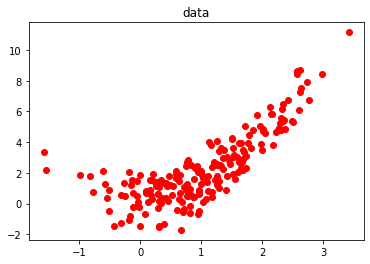

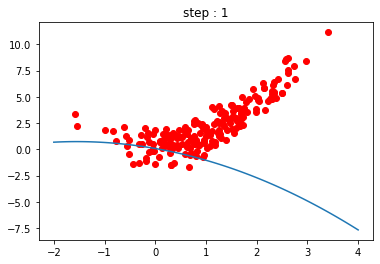

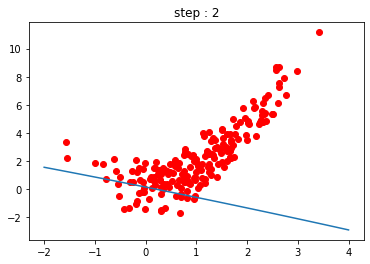

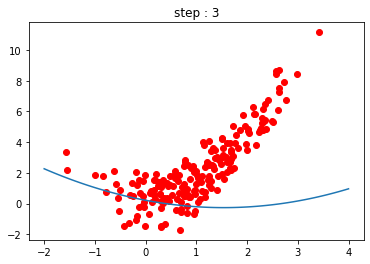

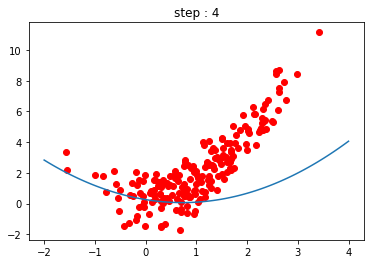

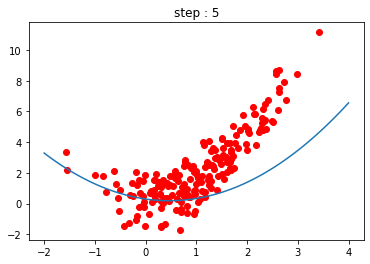

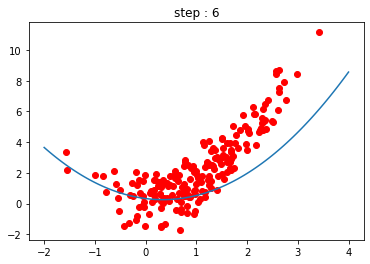

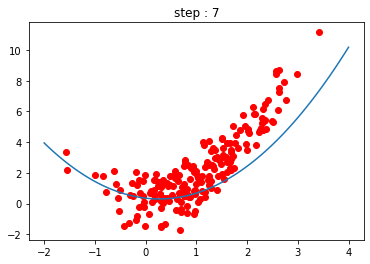

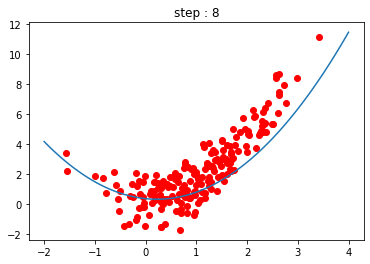

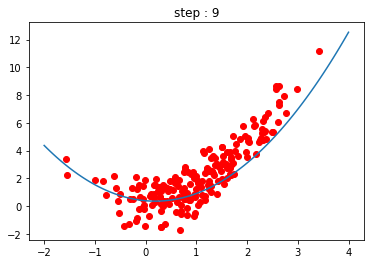

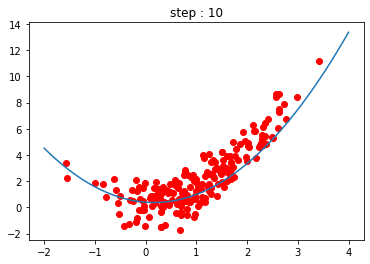

true value of W1, W2, b :  [1, 0.1, 0.3]
W1 :  [-0.27, -0.01, 0.2, 0.37, 0.51, 0.62, 0.71, 0.78, 0.84, 0.88]
W2 :  [-0.85, -0.72, -0.62, -0.54, -0.48, -0.42, -0.38, -0.34, -0.32, -0.29]
b :  [0.09, 0.16, 0.21, 0.26, 0.3, 0.32, 0.35, 0.37, 0.39, 0.4]
loss :  [24.01, 15.92, 10.67, 7.27, 5.05, 3.62, 2.69, 2.08, 1.69, 1.43]


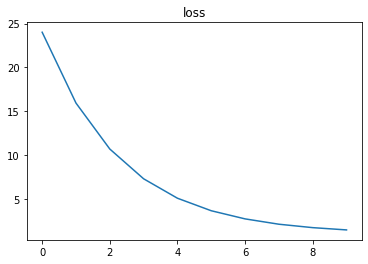

In [3]:
import tensorflow as tf
import numpy as np
import random as random
import matplotlib.pyplot as plt
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
num_points = 200
x = []
y = []
param = [1, 0.1, 0.3]
for i in range(num_points):
    temp_x = np.random.normal(1.0, 1)
    # noise
    temp_y = param[0] * temp_x ** 2 + param[1] * temp_x + param[2] + np.random.normal(0.0, 1.0)
    x.append(temp_x)
    y.append(temp_y)

# check data
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()


# parameters to optimize
W1 = tf.Variable([-0.6])
W2 = tf.Variable([-1.0])
b = tf.Variable(tf.zeros([1]))

# make loss function : MSE(mean square error)
loss = 0
for i in range(num_points):
  y_pred = W1 * (x[i] ** 2) + W2 * x[i] + b
  loss += (y[i] - y_pred)**2
loss = loss/num_points


# set optimizer with learning rate(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

# make session
sess = tf.Session()
sess.run(init)

W1_list = []
W2_list = []
b_list = []
loss_list = []
x_ = np.linspace(-2,4,100)

# training
for step in range(10):
  sess.run(train)

  # check data and model
  plt.plot(x, y, 'ro')
  y_ = sess.run(W1).item() * x_**2 + sess.run(W2).item() * x_ + sess.run(b).item()
  plt.plot(x_, y_)
  plt.title('step : ' + str(step + 1))
  plt.show()

  # store W, b, loss data
  W1_list.append(round(sess.run(W1).item(), 2))
  W2_list.append(round(sess.run(W2).item(), 2))
  b_list.append(round(sess.run(b).item(), 2))
  loss_list.append(round(sess.run(loss).item(), 2))
    
    
# check training procedure
print("true value of W1, W2, b : ", param)
print("W1 : ", W1_list)
print("W2 : ", W2_list)
print("b : ", b_list)
print("loss : ", loss_list)
plt.plot(loss_list)
plt.title('loss')
plt.show()